In [2]:
!pip install ultralytics opencv-python-headless

In [11]:
pip install ultralytics gdown

Mounted at /content/drive
Contents of cattleImages folder: ['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '29.jpg', '30.jpg', '31.jpg', '32.jpg', '33.jpg', '34.jpg', '35.jpg', '36.jpg', '37.jpg', '38.jpg', '39.jpg', '40.jpg', '41.jpg', '42.jpg', '43.jpg', '44.jpg', '45.jpg', '46.jpg', '47.jpg', '48.jpg', '49.jpg', '50.jpg', '51.jpg', '52.jpg', '53.jpg', '54.jpg', '55.jpg', '56.jpg', '57.jpg', '58.jpg', '59.jpg', '60.jpg', '61.jpg', '62.jpg', '63.jpg', '64.jpg', '65.jpg', '66.jpg', '67.jpg', '68.jpg', '69.jpg', '70.jpg', '71.jpg', '72.jpg', '73.jpg', '74.jpg', '75.jpg', '76.jpg', '77.jpg', '78.jpg', '79.jpg', '80.jpg', '81.jpg', '82.jpg', '83.jpg', '84.jpg', '85.jpg', '86.jpg', '87.jpg', '88.jpg', '89.jpg', '90.jpg', '91.jpg', '92.jpg', '93.jpg', '94.jpg', '95.jpg', '96.jpg',

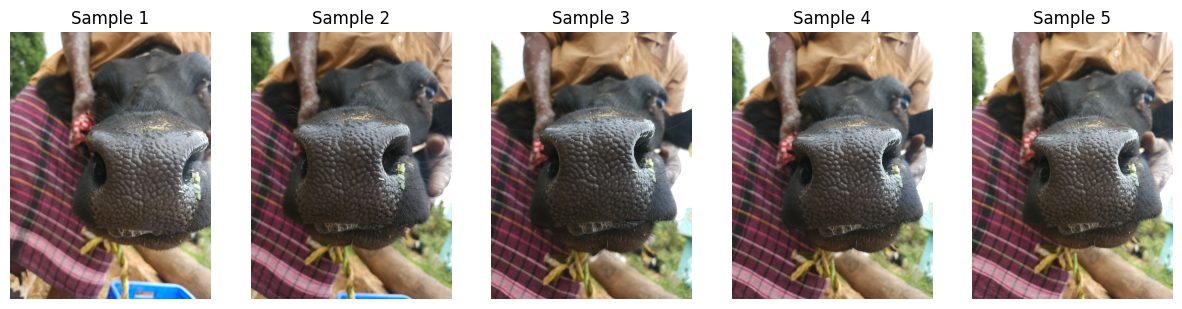

In [12]:
# Import necessary libraries
import os
import cv2
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the 'MuzzleDetection/cattleImages' folder
drive_path = '/content/drive/MyDrive'
muzzle_detection_path = os.path.join(drive_path, 'muzzle project', 'MuzzleDetection')
cattle_images_path = os.path.join(muzzle_detection_path, 'cattleImages')

# Check the contents of the 'cattleImages' folder
print("Contents of cattleImages folder:", os.listdir(cattle_images_path))

# Function to check and load images
def load_images_from_folder(folder_path):
    images = []
    if not os.path.exists(folder_path):
        print(f"The folder path '{folder_path}' does not exist.")
        return images

    # Walk through the folder to find images
    for subdir, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_path = os.path.join(subdir, file)
                image = cv2.imread(image_path)
                if image is not None:
                    images.append((image_path, image))
                else:
                    print(f"Could not read image: {image_path}")

    print(f"Total images loaded: {len(images)}")
    return images

# Function to display sample images
def display_sample_images(image_list, num_samples=5):
    if len(image_list) == 0:
        print("No images found to display.")
        return

    num_samples = min(num_samples, len(image_list))
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

    for i in range(num_samples):
        img_path, image = image_list[i]
        # Convert BGR image (OpenCV format) to RGB for displaying
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        axes[i].imshow(image_rgb)
        axes[i].axis('off')
        axes[i].set_title(f"Sample {i+1}")

    plt.show()

# Main execution
if __name__ == "__main__":
    # Load images from the 'cattleImages' folder
    images = load_images_from_folder(cattle_images_path)

    # Display sample images to verify loading
    display_sample_images(images, num_samples=5)


In [13]:
import torch
print(torch.__version__)

2.5.1+cu121


In [14]:
# Install YOLOv8
!pip install ultralytics

# Mount Google Drive to access your data
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import ultralytics
from ultralytics import YOLO

# Load the YOLO model
model = YOLO('yolov8n.pt')  # Replace with the appropriate YOLO version if needed

# Train the model
model.train(
    data='/content/drive/MyDrive/muzzle project/MuzzleDetection/muzzle.v1i.yolov8/data.yaml',  # Path to your data.yaml
    epochs=50,                # Number of epochs
    imgsz=640,                 # Image size
    batch=8,                   # Batch size
    workers=2,                 # Number of workers
    device='cpu'               # Use 'cpu' or 'cuda' (if you have a GPU)
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 59.2MB/s]


Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/muzzle project/MuzzleDetection/muzzle.v1i.yolov8/data.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=2, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

100%|██████████| 755k/755k [00:00<00:00, 15.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/muzzle project/MuzzleDetection/muzzle.v1i.yolov8/train/labels.cache... 232 images, 0 backgrounds, 0 corrupt: 100%|██████████| 232/232 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/muzzle project/MuzzleDetection/muzzle.v1i.yolov8/valid/labels.cache... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G     0.9584      2.192      1.339         17        640: 100%|██████████| 29/29 [03:29<00:00,  7.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.54s/it]

                   all         23         23          1       0.65      0.971      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G     0.8481      1.467      1.168         14        640: 100%|██████████| 29/29 [03:25<00:00,  7.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.95s/it]

                   all         23         23      0.242      0.304      0.315      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G     0.8205       1.31      1.136         17        640: 100%|██████████| 29/29 [03:24<00:00,  7.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.59s/it]

                   all         23         23      0.755      0.804      0.835      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G     0.8495      1.129      1.122         12        640: 100%|██████████| 29/29 [03:24<00:00,  7.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.41s/it]

                   all         23         23      0.904       0.87      0.927        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G     0.7995      1.065      1.123         18        640: 100%|██████████| 29/29 [03:28<00:00,  7.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.42s/it]

                   all         23         23      0.632      0.435      0.504      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G     0.8436     0.9787      1.141         19        640: 100%|██████████| 29/29 [03:23<00:00,  7.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.34s/it]

                   all         23         23      0.994          1      0.995      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      0.787     0.8797      1.098         19        640: 100%|██████████| 29/29 [03:46<00:00,  7.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.09s/it]

                   all         23         23      0.953      0.957       0.99       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G     0.7376     0.8074      1.062         15        640: 100%|██████████| 29/29 [03:33<00:00,  7.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.15s/it]

                   all         23         23       0.86      0.803      0.894      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G     0.6871     0.7577      1.042         18        640: 100%|██████████| 29/29 [03:25<00:00,  7.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.29s/it]

                   all         23         23      0.998      0.957      0.972      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G     0.7223     0.7569      1.041         19        640: 100%|██████████| 29/29 [03:25<00:00,  7.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.96s/it]

                   all         23         23      0.999          1      0.995      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G     0.6672     0.7065      1.046         13        640: 100%|██████████| 29/29 [03:23<00:00,  7.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.39s/it]

                   all         23         23      0.917      0.955      0.977      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G     0.7149     0.6944      1.067         16        640: 100%|██████████| 29/29 [03:25<00:00,  7.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  4.00s/it]

                   all         23         23          1      0.952      0.955      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G     0.6603     0.6267      1.033         15        640: 100%|██████████| 29/29 [03:23<00:00,  7.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.24s/it]

                   all         23         23      0.997      0.957      0.955      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G     0.6737     0.6222      1.035         13        640: 100%|██████████| 29/29 [03:23<00:00,  7.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.76s/it]

                   all         23         23      0.996      0.957       0.99      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      0.685     0.6503      1.063         11        640: 100%|██████████| 29/29 [03:23<00:00,  7.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.58s/it]

                   all         23         23      0.992          1      0.995      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G     0.6736     0.5942      1.035         19        640: 100%|██████████| 29/29 [03:24<00:00,  7.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.24s/it]

                   all         23         23          1      0.909      0.952      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G     0.6542     0.5923      1.034         16        640: 100%|██████████| 29/29 [03:24<00:00,  7.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.96s/it]

                   all         23         23          1      0.953      0.978       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G     0.6391     0.5878       1.03         13        640: 100%|██████████| 29/29 [03:25<00:00,  7.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.79s/it]

                   all         23         23          1      0.998      0.995       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G     0.6352     0.5637      1.024         15        640: 100%|██████████| 29/29 [03:27<00:00,  7.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.45s/it]

                   all         23         23      0.998          1      0.995      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G     0.6059      0.524      1.018         24        640: 100%|██████████| 29/29 [03:22<00:00,  7.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.94s/it]

                   all         23         23          1      0.999      0.995       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G     0.5957      0.534      1.009         22        640: 100%|██████████| 29/29 [03:28<00:00,  7.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.02s/it]

                   all         23         23          1      0.996      0.995      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G     0.5647     0.4993     0.9856         16        640: 100%|██████████| 29/29 [03:22<00:00,  6.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.12s/it]

                   all         23         23      0.995      0.913      0.953      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G       0.57     0.4955      1.002         12        640: 100%|██████████| 29/29 [03:23<00:00,  7.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.48s/it]

                   all         23         23          1      0.954      0.993      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G     0.5998     0.5109     0.9997         20        640: 100%|██████████| 29/29 [03:26<00:00,  7.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.40s/it]

                   all         23         23          1      0.997      0.995      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G     0.5204     0.4402     0.9848         17        640: 100%|██████████| 29/29 [03:24<00:00,  7.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.10s/it]

                   all         23         23      0.994      0.957      0.993      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G     0.5592     0.4598      1.006         12        640: 100%|██████████| 29/29 [03:23<00:00,  7.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.27s/it]

                   all         23         23      0.998          1      0.995      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G     0.5549     0.4481     0.9803         16        640: 100%|██████████| 29/29 [03:23<00:00,  7.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.54s/it]

                   all         23         23          1          1      0.995       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.5633     0.4639     0.9903         18        640: 100%|██████████| 29/29 [03:26<00:00,  7.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.40s/it]

                   all         23         23          1      0.997      0.995      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G     0.5477     0.4283     0.9668         22        640: 100%|██████████| 29/29 [03:25<00:00,  7.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.88s/it]

                   all         23         23          1      0.954      0.992      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.5664     0.4449     0.9854         16        640: 100%|██████████| 29/29 [03:23<00:00,  7.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.49s/it]

                   all         23         23      0.997      0.957      0.992      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G     0.5374     0.4308     0.9717         16        640: 100%|██████████| 29/29 [03:23<00:00,  7.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.96s/it]

                   all         23         23          1      0.998      0.995      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.5274     0.4081     0.9836         15        640: 100%|██████████| 29/29 [03:22<00:00,  7.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.34s/it]

                   all         23         23          1      0.998      0.995      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.4948        0.4     0.9745          9        640: 100%|██████████| 29/29 [03:21<00:00,  6.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.28s/it]

                   all         23         23      0.997      0.957      0.993      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G     0.5349     0.4246      0.983         10        640: 100%|██████████| 29/29 [03:23<00:00,  7.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.48s/it]

                   all         23         23          1      0.999      0.995      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.5067     0.4105     0.9705         14        640: 100%|██████████| 29/29 [03:24<00:00,  7.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.92s/it]

                   all         23         23          1      0.997      0.995      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.4803     0.4134      0.962         17        640: 100%|██████████| 29/29 [03:25<00:00,  7.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.53s/it]

                   all         23         23          1      0.998      0.995      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.4907     0.4091       0.96         17        640: 100%|██████████| 29/29 [03:26<00:00,  7.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.45s/it]

                   all         23         23          1      0.999      0.995      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.5082     0.3877     0.9617         13        640: 100%|██████████| 29/29 [03:21<00:00,  6.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.15s/it]

                   all         23         23          1      0.997      0.995      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.5056     0.3769     0.9826         20        640: 100%|██████████| 29/29 [03:23<00:00,  7.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.18s/it]

                   all         23         23          1      0.997      0.995      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.4684     0.3734     0.9474         14        640: 100%|██████████| 29/29 [03:26<00:00,  7.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.59s/it]

                   all         23         23          1      0.997      0.995      0.754


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.4144     0.3396     0.9136          8        640: 100%|██████████| 29/29 [03:22<00:00,  6.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.43s/it]

                   all         23         23          1      0.999      0.995      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.4166     0.3357     0.9426          8        640: 100%|██████████| 29/29 [03:22<00:00,  6.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.16s/it]

                   all         23         23      0.998          1      0.995      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.3875     0.3089     0.9109          8        640: 100%|██████████| 29/29 [03:23<00:00,  7.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.85s/it]

                   all         23         23      0.998          1      0.995      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.3956     0.3032     0.9211          8        640: 100%|██████████| 29/29 [03:23<00:00,  7.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.42s/it]

                   all         23         23      0.998          1      0.995      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.3884     0.2941     0.9042          8        640: 100%|██████████| 29/29 [03:25<00:00,  7.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.58s/it]

                   all         23         23      0.998          1      0.995      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.3895     0.3047     0.9036          8        640: 100%|██████████| 29/29 [03:27<00:00,  7.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.33s/it]

                   all         23         23      0.998          1      0.995      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.3819     0.2995     0.9122          8        640: 100%|██████████| 29/29 [03:28<00:00,  7.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.60s/it]

                   all         23         23      0.998          1      0.995      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.3662     0.2824     0.9159          8        640: 100%|██████████| 29/29 [03:25<00:00,  7.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.66s/it]

                   all         23         23      0.997          1      0.995      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G      0.359     0.2772     0.8969          8        640: 100%|██████████| 29/29 [03:24<00:00,  7.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.16s/it]

                   all         23         23      0.998          1      0.995      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.3421     0.2644     0.8847          8        640: 100%|██████████| 29/29 [03:25<00:00,  7.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.01s/it]

                   all         23         23      0.999          1      0.995      0.745



50 epochs completed in 2.976 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.51s/it]


                   all         23         23          1      0.954      0.992      0.792
Speed: 6.9ms preprocess, 280.3ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c95173dece0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [16]:
metrics = model.val()  # Validate the model on the validation set
print(metrics)


Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/muzzle project/MuzzleDetection/muzzle.v1i.yolov8/valid/labels.cache... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:11<00:00,  3.75s/it]


                   all         23         23          1      0.954      0.992      0.792
Speed: 5.0ms preprocess, 454.9ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c9617b6a380>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.0

In [12]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
from ultralytics import YOLO

# Load the trained YOLO model
model = YOLO('/content/runs/detect/train/weights/last.pt')  # Path to trained weights

# Run inference
results = model.predict(
    source='/content/drive/MyDrive/muzzle project/MuzzleDetection/cattleImages',  # Input images directory
    imgsz=640,
    conf=0.25,
    save=True,  # Ensure saving is enabled
)


image 1/125 /content/drive/MyDrive/muzzle project/MuzzleDetection/cattleImages/1.jpg: 640x480 1 muzzle, 168.0ms
image 2/125 /content/drive/MyDrive/muzzle project/MuzzleDetection/cattleImages/10.jpg: 640x480 1 muzzle, 162.1ms
image 3/125 /content/drive/MyDrive/muzzle project/MuzzleDetection/cattleImages/100.jpg: 640x480 1 muzzle, 157.6ms
image 4/125 /content/drive/MyDrive/muzzle project/MuzzleDetection/cattleImages/101.jpg: 640x480 1 muzzle, 164.8ms
image 5/125 /content/drive/MyDrive/muzzle project/MuzzleDetection/cattleImages/102.jpg: 640x480 1 muzzle, 166.0ms
image 6/125 /content/drive/MyDrive/muzzle project/MuzzleDetection/cattleImages/103.jpg: 640x480 1 muzzle, 157.1ms
image 7/125 /content/drive/MyDrive/muzzle project/MuzzleDetection/cattleImages/104.jpg: 640x480 1 muzzle, 168.3ms
image 8/125 /content/drive/MyDrive/muzzle project/MuzzleDetection/cattleImages/105.jpg: 640x480 1 muzzle, 154.6ms
image 9/125 /content/drive/MyDrive/muzzle project/MuzzleDetection/cattleImages/106.jpg: 64

In [14]:
import shutil

# Source directory where results are saved
source_folder = 'runs/detect/predict3'

# Destination directory (Google Drive folder)
destination_folder = r'/content/drive/MyDrive/muzzle project/MuzzleDetection/cropped_muzzles'

# Move images from the default save directory to the desired output folder
for file_name in os.listdir(source_folder):
    file_path = os.path.join(source_folder, file_name)
    if os.path.isfile(file_path):
        shutil.move(file_path, os.path.join(destination_folder, file_name))

print("Moved images to:", destination_folder)


Moved images to: /content/drive/MyDrive/muzzle project/MuzzleDetection/cropped_muzzles


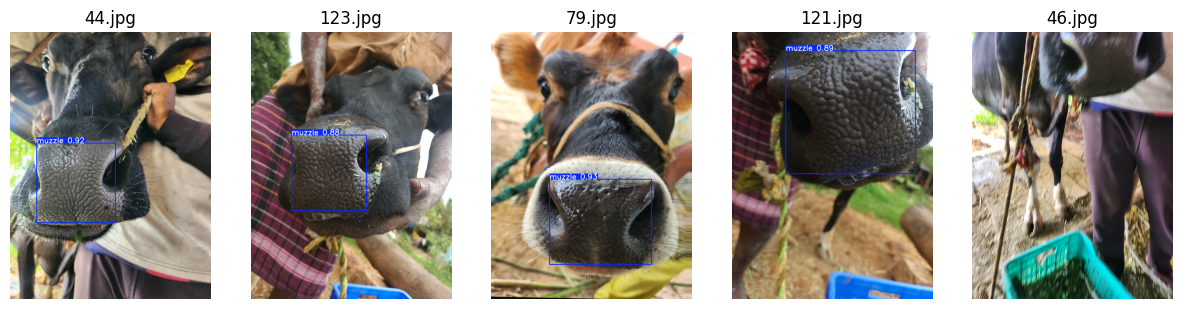

In [15]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Path to the cropped_muzzles folder
cropped_muzzles_dir = '/content/drive/MyDrive/muzzle project/MuzzleDetection/cropped_muzzles'

# List all image files in the directory (you can adjust the filter to suit your image type, e.g., *.jpg)
image_files = [f for f in os.listdir(cropped_muzzles_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Select 5 random images
sample_images = random.sample(image_files, 5)

# Set up the figure for displaying images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))  # 5 images side by side

# Loop through the sample images and display them
for i, img_file in enumerate(sample_images):
    img_path = os.path.join(cropped_muzzles_dir, img_file)
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')  # Hide axis for better display
    axes[i].set_title(img_file)  # Display the image file name as title

plt.show()
